# Functions

In [3]:
import pandas as pd
import researchpy as rp
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Export.csv')
data = data.rename(columns={"Unnamed: 0": "Subs"})
data.head()

,Subs,Value,Orientation,Familiarity,Type
0,Sub 2,0.54,upright,unfamiliar,discrimination
1,Sub 3,0.52,upright,unfamiliar,discrimination
2,Sub 4,0.53,upright,unfamiliar,discrimination
3,Sub 5,0.57,upright,unfamiliar,discrimination
4,Sub 6,0.53,upright,unfamiliar,discrimination


# Discrimination

In [4]:
sum_df = rp.summary_cont(data.loc[data['Type'] == 'discrimination'].groupby(['Orientation', 'Familiarity']))['Value']
sum_df

N   Mean        SD        SE  95% Conf.  Interval
Orientation Familiarity                                                    
inverted    famous       10  0.555  0.037491  0.011856   0.531763  0.578237
            unfamiliar   10  0.581  0.036347  0.011494   0.558472  0.603528
upright     famous       10  0.541  0.032813  0.010376   0.520663  0.561337
            unfamiliar   10  0.548  0.026583  0.008406   0.531524  0.564476

In [5]:
data_discr = data.loc[data['Type']=='discrimination']
aov_fr = pg.rm_anova(data=data_discr, dv='Value', within=['Orientation','Familiarity'], subject='Subs')
print(f'df effect {4*0.607:.2f}')
print(f'df error {152*0.607:.2f}')
aov_fr.style.applymap(color_significant, subset=['p-GG-corr','p-unc'])


df effect 2.43
df error 92.26


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Orientation,0.006,1,9,0.006,11.827,0.00740191,0.00740191,0.568,1
1,Familiarity,0.003,1,9,0.003,5.211,0.0483519,0.0483519,0.367,1
2,Orientation * Familiarity,0.001,1,9,0.001,2.019,0.189022,0.189022,0.183,1


# Reconstruction

In [6]:
sum_df = rp.summary_cont(data.loc[data['Type'] == 'reconstruction'].groupby(['Orientation', 'Familiarity']))['Value']
sum_df

N   Mean        SD        SE  95% Conf.  Interval
Orientation Familiarity                                                    
inverted    famous       10  0.522  0.053292  0.016852   0.488969  0.555031
            unfamiliar   10  0.533  0.029078  0.009195   0.514977  0.551023
upright     famous       10  0.535  0.051045  0.016142   0.503362  0.566638
            unfamiliar   10  0.521  0.050431  0.015948   0.489742  0.552258

In [7]:
data_recon = data.loc[data['Type']=='reconstruction']
aov_recon = pg.rm_anova(data=data_recon, dv='Value', within=['Orientation','Familiarity'], subject='Subs')
print(f'df effect {4*0.607:.2f}')
print(f'df error {152*0.607:.2f}')
aov_recon.style.applymap(color_significant, subset=['p-GG-corr','p-unc'])

df effect 2.43
df error 92.26


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Orientation,0,1,9,0,0.001,0.976592,0.976592,0,1
1,Familiarity,0,1,9,0,0.016,0.902681,0.902681,0.002,1
2,Orientation * Familiarity,0.002,1,9,0.002,1.812,0.211238,0.211238,0.168,1


"\na1 = plt.subplot(122) \nsns.pointplot(y='value',x='bands',hue = 'category', data=data_fq, \n            order = ['delta','theta','alpha','beta','gamma'],\n            dodge=True, capsize=0.1, palette = palette)\nsns.despine()\na1.set(xlabel='Frequency band', ylabel='Ranks')\n"

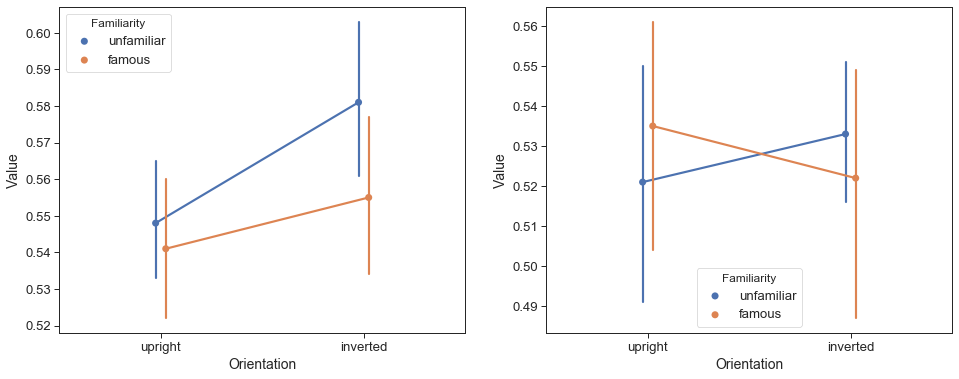

In [10]:
%matplotlib inline
sns.set_context("paper", font_scale=1.5, rc={"font.size":12,"axes.labelsize":14})
plt.figure(figsize=(16, 6))
plt.subplot(121) 
sns.pointplot(x="Orientation", y="Value",hue="Familiarity", 
                data=data_discr, kind="point",dodge=True)

plt.subplot(122) 
sns.pointplot(x="Orientation", y="Value",hue="Familiarity", 
                data=data_recon, kind="point",dodge=True)

'''
a1 = plt.subplot(122) 
sns.pointplot(y='value',x='bands',hue = 'category', data=data_fq, 
            order = ['delta','theta','alpha','beta','gamma'],
            dodge=True, capsize=0.1, palette = palette)
sns.despine()
a1.set(xlabel='Frequency band', ylabel='Ranks')
'''




In [29]:
from scipy.stats import ttest_1samp
table = pd.pivot_table(data, values=['Value'], columns=['Type','Orientation','Familiarity'], index=['Subs'])
table.apply(lambda x: ttest_1samp(x, 0.5),result_type='expand')

Value                                                 \
Type        discrimination                                 reconstruction   
Orientation       inverted              upright                  inverted   
Familiarity         famous unfamiliar    famous unfamiliar         famous   
0                 4.639153    7.04718  3.951329   5.709971        1.30546   
1                 0.001221    0.00006  0.003348   0.000291        0.22412   

                                             
Type                                         
Orientation              upright             
Familiarity unfamiliar    famous unfamiliar  
0             3.588747  2.168293   1.316793  
1             0.005850  0.058275   0.220450

# Functions

In [1]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov


def color_significant(value):
    import pandas as pd
    import numpy as np
    '''
        Colors elements in a dateframe
      green if positive and red if
      negative. Does not color NaN
      values.
     '''
    try:
        float(value)
        if float(value) < 0.001:
            color = 'purple'
        elif float(value) < 0.05:
            color = 'red'
        else:
            color = 'black'
    except: 
        color = 'black'
    return 'color: %s' % color    